In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 21s 5us/step


In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta, Adam

In [60]:
model = Sequential()

In [61]:
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1),activation='relu'))

In [62]:
model.add(MaxPool2D(pool_size=(2,2)))

In [63]:
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))

In [64]:
model.add(MaxPool2D(pool_size=(2,2)))

In [65]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

In [66]:
model.add(MaxPool2D(pool_size=(2,2)))

In [67]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))

In [68]:
model.add(Dense(128, activation='relu'))

In [69]:
model.add(Dense(32, activation='relu'))

In [70]:
model.add(Dense(10, activation='softmax'))

In [71]:
model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)              

In [73]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0342 - accuracy: 0.7465
Epoch 2/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0220 - accuracy: 0.8464
Epoch 3/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.0187 - accuracy: 0.8703
Epoch 4/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.0173 - accuracy: 0.8818
Epoch 5/20
60000/60000 [==============================] - 18s 303us/step - loss: 0.0161 - accuracy: 0.8894
Epoch 6/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0150 - accuracy: 0.8974
Epoch 7/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.0144 - accuracy: 0.9014
Epoch 8/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0139 - accuracy: 0.9051
Epoch 9/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0134 - accuracy: 0.9087
Epoch 10/20
60000/60000 [============

In [75]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 94us/step


In [76]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]:.5f}')

測試資料的 loss: 0.01443
測試資料的正確率: 0.90280


In [77]:
model.save("CNNmodel_fashion")

In [78]:
del model

In [79]:
from keras.models import load_model

In [80]:
model = load_model('CNNmodel_fashion')

In [81]:
predict = model.predict_classes(x_test)

In [83]:
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

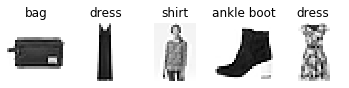

In [85]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(labelNames[predict[pick[i]]])
    plt.axis("off")